<a href="https://colab.research.google.com/github/MahmoudHozayen1/Weather-Forecast/blob/main/Final_project_for_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
weather = pd.read_csv('weather.csv')
fuel = pd.read_csv('fuel pricing.csv')
sales = pd.read_csv('sales.csv')

<ipython-input-2-4d75dafe6043>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('sales.csv')


In [3]:
print ('weather shape:', weather.shape)
print ('fuel shape:', fuel.shape)
print ('sales shape:', sales.shape)

weather shape: (8190, 3)
fuel shape: (8190, 3)
sales shape: (275380, 5)


In [4]:
print ('weather info:', weather.info()) #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB
weather info: None


In [5]:
print ('fuel info:', fuel.info()) #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       8190 non-null   int64  
 1   Date        8190 non-null   object 
 2   Fuel_Price  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB
fuel info: None


In [6]:
print('sales info:', sales.info());  #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275380 entries, 0 to 275379
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         275380 non-null  int64  
 1   Category      275380 non-null  int64  
 2   Date          275380 non-null  object 
 3   Weekly_Sales  275379 non-null  float64
 4   Holiday       275379 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB
sales info: None


In [7]:
weather.head(10) #the top ten for weather

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [8]:
fuel.head(10) #the top ten for fuel

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [9]:
sales.head(10) #the top ten for sales

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [10]:
weather['Temperature'].describe() #descriptive statistics for temperature

,Temperature
count,8190.000000
mean,59.356198
std,18.678607
min,-7.290000
25%,45.902500
50%,60.710000
75%,73.880000
max,101.950000


In [11]:
fuel['Fuel_Price'].describe() #descriptive statistics for price

,Fuel_Price
count,8190.000000
mean,3.405992
std,0.431337
min,2.472000
25%,3.041000
50%,3.513000
75%,3.743000
max,4.468000


In [12]:
sales['Weekly_Sales'].describe() #descriptive statistics for sales

,Weekly_Sales
count,275379.000000
mean,17502.915189
std,24252.470230
min,-4988.940000
25%,2806.350000
50%,8609.080000
75%,22071.495000
max,693099.360000


In [13]:
weather.isnull().sum() #checking for null values in weather

,0
Store,0
Date,0
Temperature,0


In [14]:

fuel.isnull().sum() #checking for null values in fuel


,0
Store,0
Date,0
Fuel_Price,0


In [15]:
sales.isnull().sum() #checking for null values in sales

,0
Store,0
Category,0
Date,0
Weekly_Sales,1
Holiday,1


In [16]:
# prompt: #checking for negative values in sales

negative_sales = sales[sales['Weekly_Sales'] < 0]
print(negative_sales.shape)


(779, 5)


In [17]:
sales[sales['Weekly_Sales'] < 0].count()  #no negative values in sales

,0
Store,779
Category,779
Date,779
Weekly_Sales,779
Holiday,779


In [18]:
sales = sales[sales['Weekly_Sales'] >= 0]

In [19]:
fuel[fuel['Fuel_Price'] < 0].count() #no negative values in fuel

,0
Store,0
Date,0
Fuel_Price,0


In [20]:
#fix the date and store column in weather
weather = weather.rename(columns={'Date       ': 'Date'})
weather = weather.rename(columns={'Store ': 'Store'})

In [21]:
# prompt: Merge all datasets into data frame based on the date and store

df = pd.merge(pd.merge(weather, fuel, on=['Date', 'Store']), sales, on=['Date', 'Store'])
df.head()


,Store,Date,Temperature,Fuel_Price,Category,Weekly_Sales,Holiday
0,1,2010-02-05,42.31,2.572,1,24924.50,False
1,1,2010-02-05,42.31,2.572,2,50605.27,False
2,1,2010-02-05,42.31,2.572,3,13740.12,False
3,1,2010-02-05,42.31,2.572,4,39954.04,False
4,1,2010-02-05,42.31,2.572,5,32229.38,False


In [22]:
df

,Store,Date,Temperature,Fuel_Price,Category,Weekly_Sales,Holiday
0,1,2010-02-05,42.31,2.572,1,24924.50,False
1,1,2010-02-05,42.31,2.572,2,50605.27,False
2,1,2010-02-05,42.31,2.572,3,13740.12,False
3,1,2010-02-05,42.31,2.572,4,39954.04,False
4,1,2010-02-05,42.31,2.572,5,32229.38,False
...,...,...,...,...,...,...,...
274595,28,2012-10-26,65.95,4.301,74,9552.80,False
274596,28,2012-10-26,65.95,4.301,79,39065.13,False
274597,28,2012-10-26,65.95,4.301,80,17707.94,False
274598,28,2012-10-26,65.95,4.301,81,20497.92,False


In [23]:
df.isnull().sum()


,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
Category,0
Weekly_Sales,0
Holiday,0


In [24]:
df.duplicated().sum() #checking for duplicates

0

In [25]:
df = df.dropna() #drop null values
df

,Store,Date,Temperature,Fuel_Price,Category,Weekly_Sales,Holiday
0,1,2010-02-05,42.31,2.572,1,24924.50,False
1,1,2010-02-05,42.31,2.572,2,50605.27,False
2,1,2010-02-05,42.31,2.572,3,13740.12,False
3,1,2010-02-05,42.31,2.572,4,39954.04,False
4,1,2010-02-05,42.31,2.572,5,32229.38,False
...,...,...,...,...,...,...,...
274595,28,2012-10-26,65.95,4.301,74,9552.80,False
274596,28,2012-10-26,65.95,4.301,79,39065.13,False
274597,28,2012-10-26,65.95,4.301,80,17707.94,False
274598,28,2012-10-26,65.95,4.301,81,20497.92,False


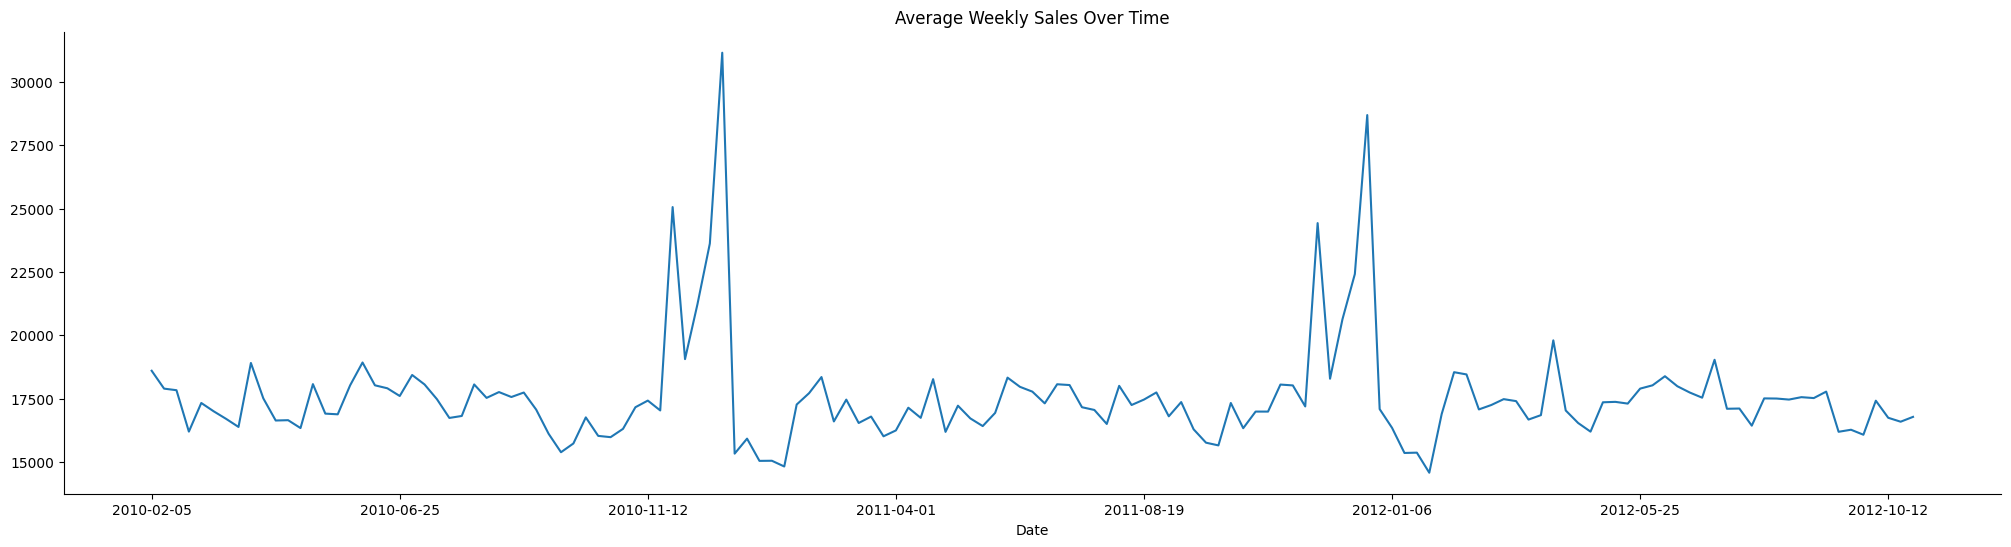

In [26]:
#chart to illustrate if weekly sales are increasing or decreasing over time.
df.sort_values('Date', inplace=True)

df.groupby('Date')['Weekly_Sales'].mean().plot(kind='line', figsize=(25, 6), title='Average Weekly Sales Over Time')
plt.gca().spines[['top', 'right']].set_visible(False)


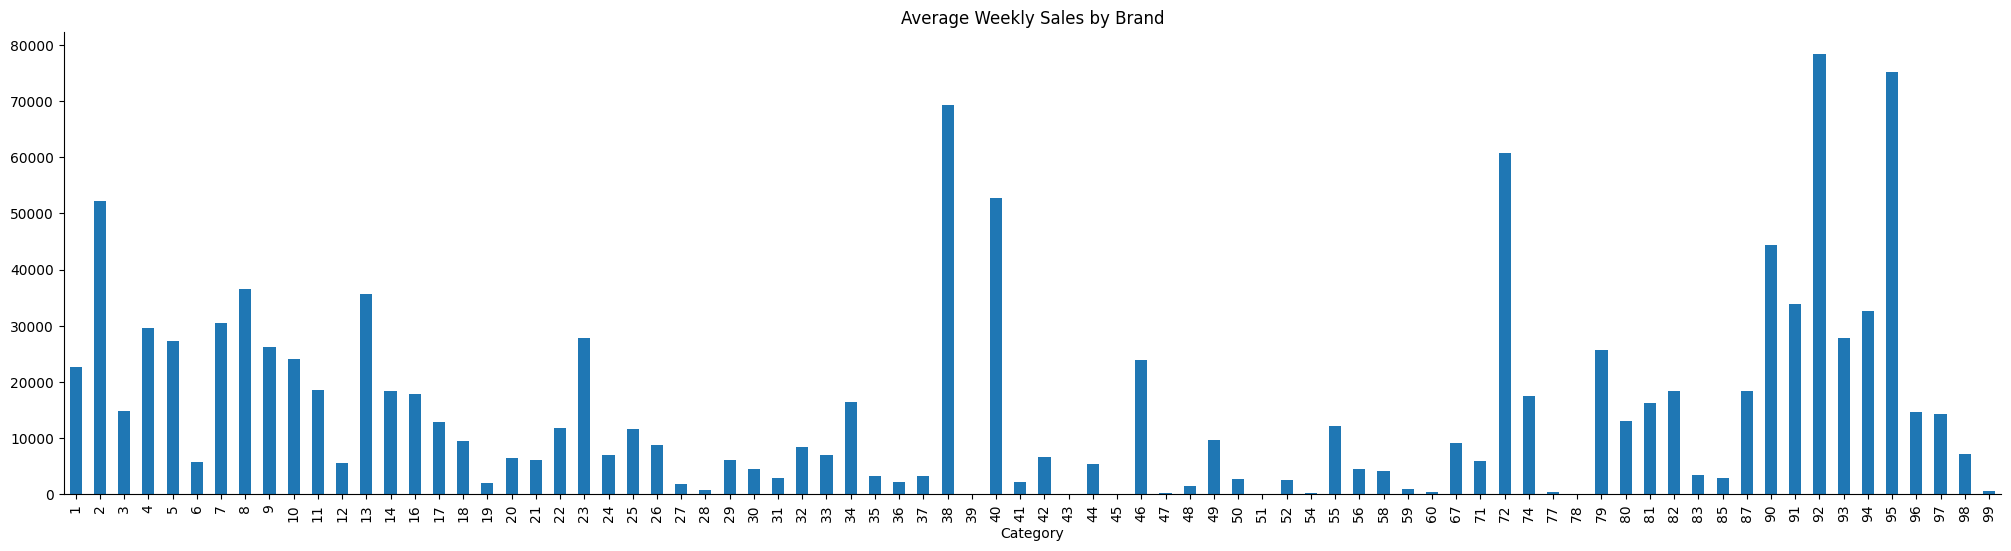

In [27]:
#a chart to show how much each brand sells.

df.groupby('Category')['Weekly_Sales'].mean().plot(kind='bar', figsize=(25, 6), title='Average Weekly Sales by Brand')
plt.gca().spines[['top', 'right']].set_visible(False)


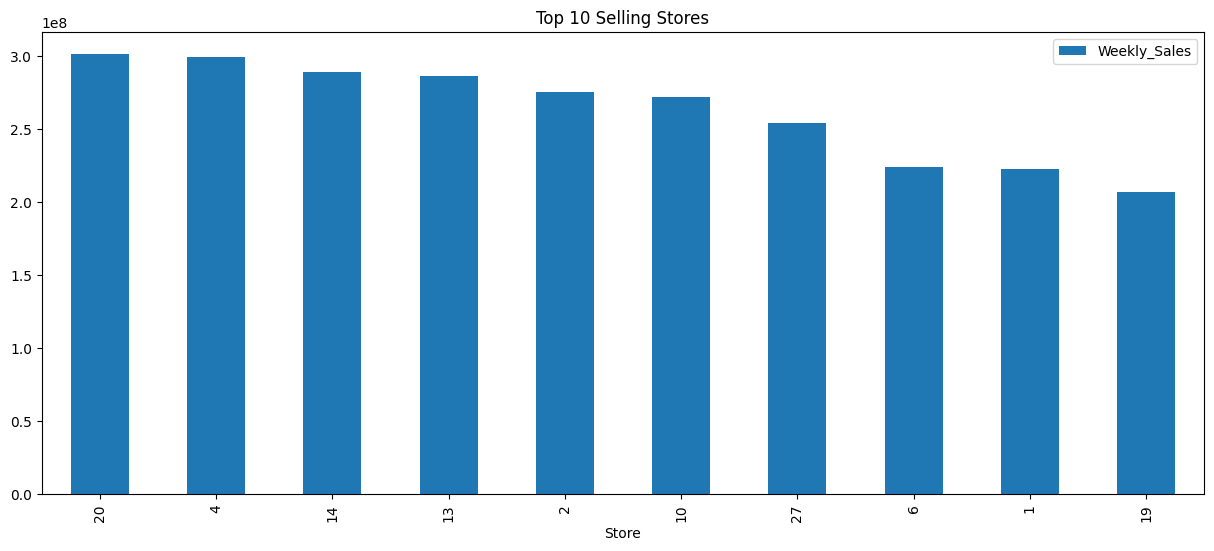

In [28]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10) #top ten selling stores
(top_stores).plot(kind='bar', figsize=(15,6), x='Store', y='Weekly_Sales');
plt.title('Top 10 Selling Stores')
plt.legend();

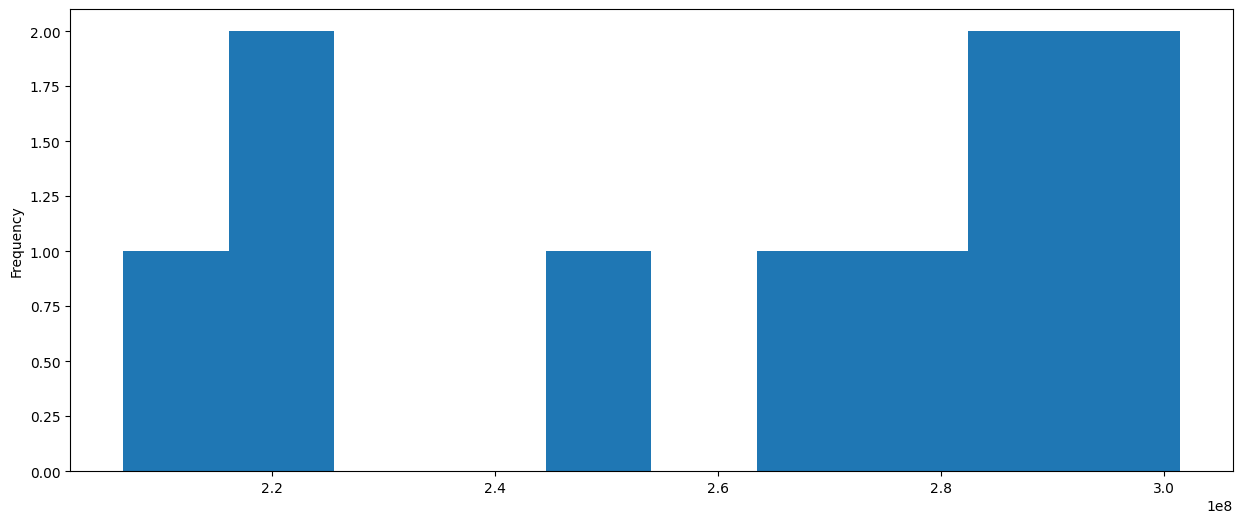

In [29]:
# a histogram to show the top 10 stores sales.

df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='hist', figsize=(15,6));


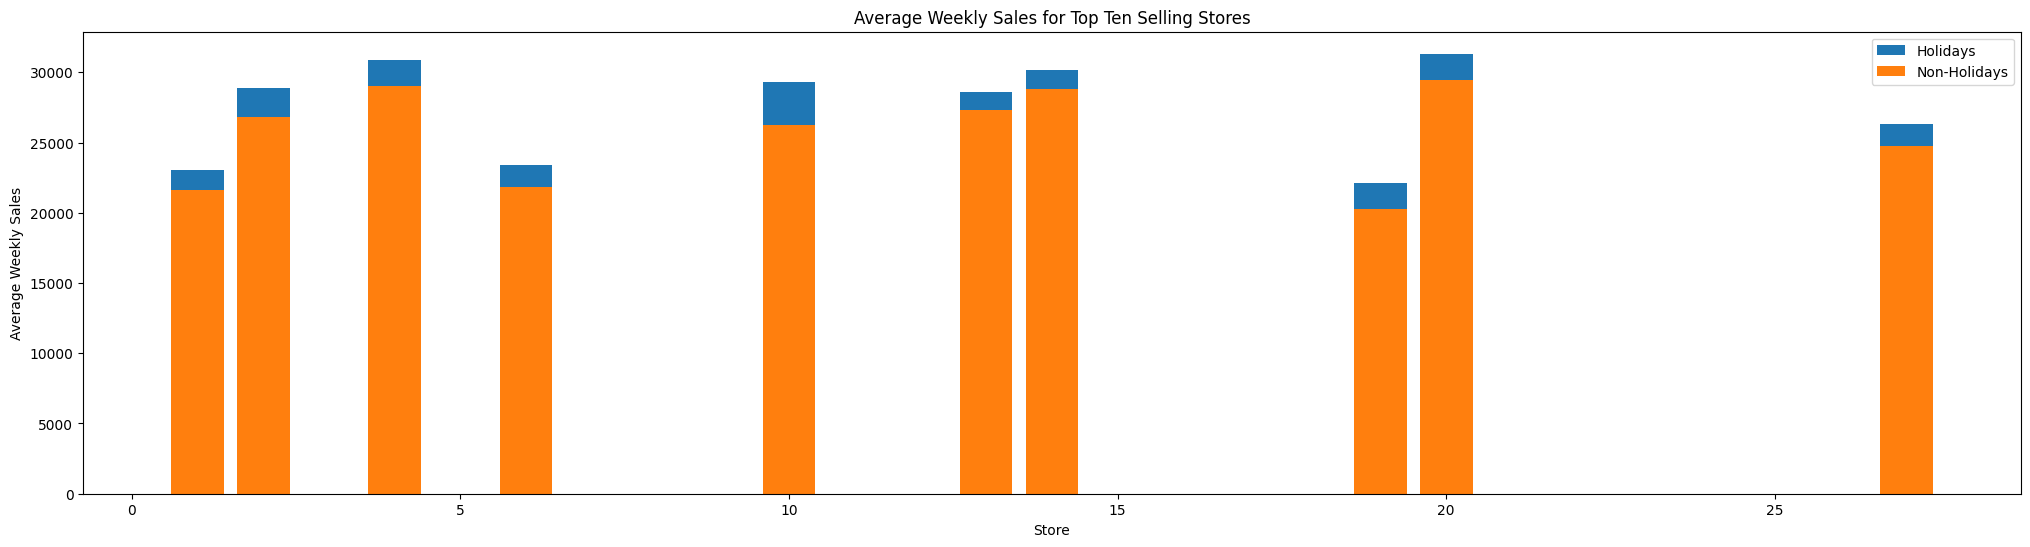

In [30]:
# Filter the data for holidays and non-holidays
holidays = df[df['Holiday'] == True]
non_holidays = df[df['Holiday'] == False]

# Calculate the average weekly sales for holidays and non-holidays for the top ten stores
avg_sales_holidays = holidays[holidays['Store'].isin(top_stores.index)].groupby('Store')['Weekly_Sales'].mean()
avg_sales_non_holidays = non_holidays[non_holidays['Store'].isin(top_stores.index)].groupby('Store')['Weekly_Sales'].mean()

# Plot the average weekly sales for holidays and non-holidays
plt.figure(figsize=(25, 6))
plt.bar(avg_sales_holidays.index, avg_sales_holidays, label='Holidays')
plt.bar(avg_sales_non_holidays.index, avg_sales_non_holidays, label='Non-Holidays')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Top Ten Selling Stores')
plt.legend()
plt.show()

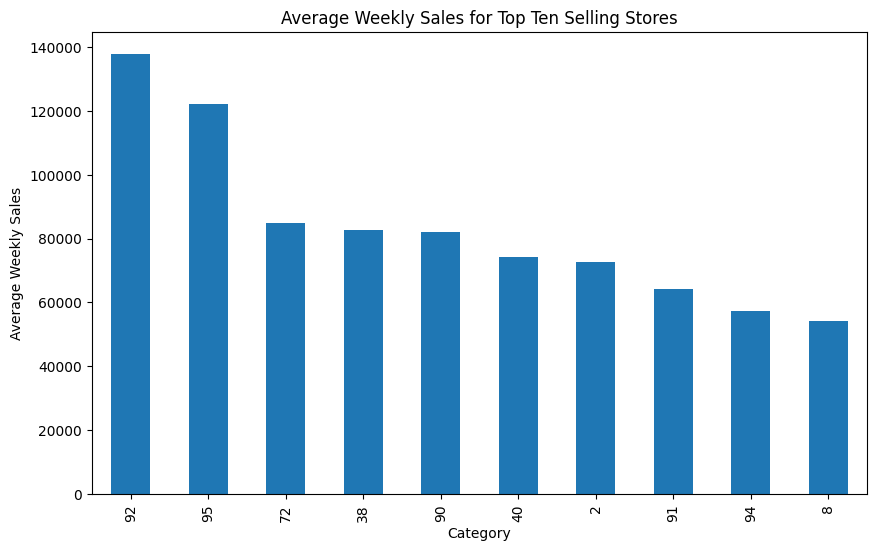

In [31]:
avg_sales_dept = df[df['Store'].isin(top_stores.index)].groupby('Category')['Weekly_Sales'].mean() #average weekly sales for each brand department
avg_sales_dept = avg_sales_dept.sort_values(ascending=False).head(10) #top ten selling departments
avg_sales_dept.plot(kind='bar', figsize=(10,6)) #bar plot for top ten selling departments
plt.xlabel('Category') #x-axis label
plt.ylabel('Average Weekly Sales') #y-axis label
plt.title('Average Weekly Sales for Top Ten Selling Stores') #title
plt.show() #show plot

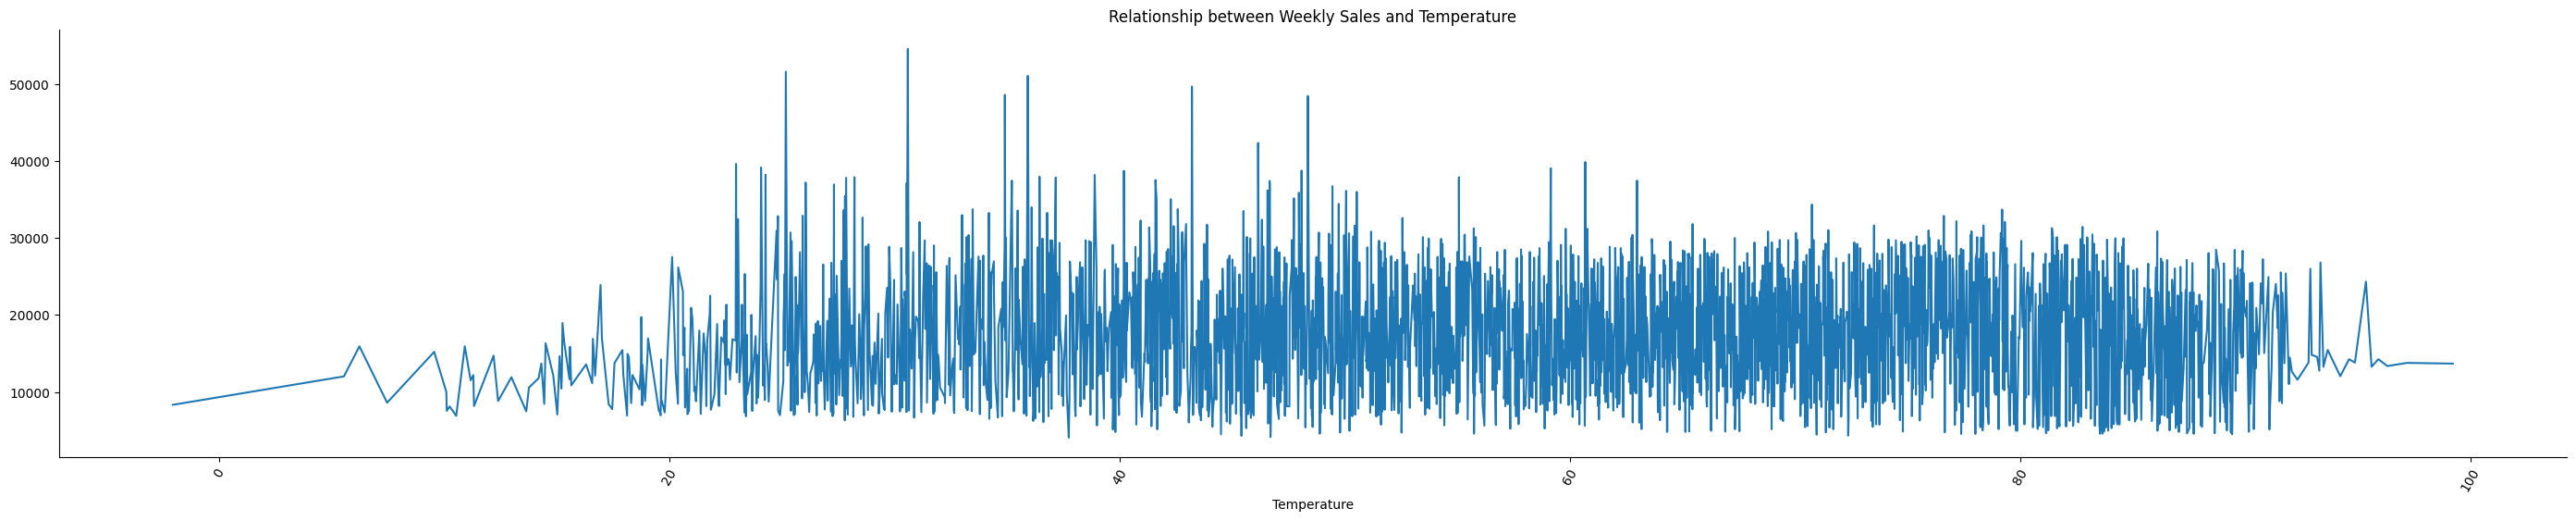

In [32]:
# a chart to show the relationship between temperature and weekly sales

df.groupby('Temperature')['Weekly_Sales'].mean().plot(kind='line', figsize=(35, 6), title='Relationship between Weekly Sales and Temperature', rot=60)
plt.gca().spines[['top', 'right']].set_visible(False)


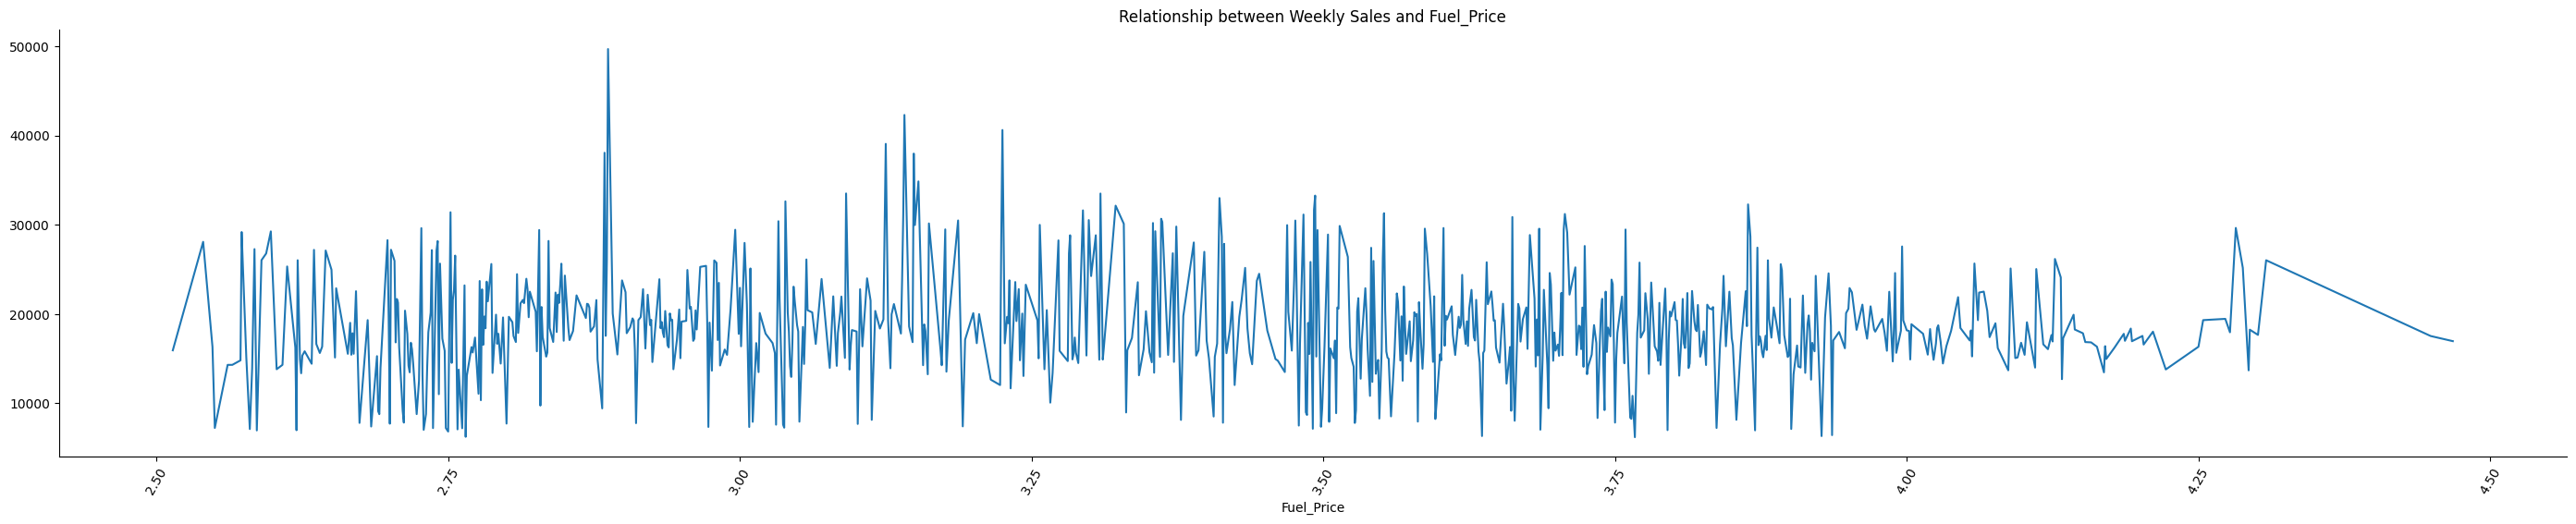

In [33]:
# a chart to show the relationship between fuel price and weekly sales

df.groupby('Fuel_Price')['Weekly_Sales'].mean().plot(kind='line', figsize=(35, 6), title='Relationship between Weekly Sales and Fuel_Price', rot=60)
plt.gca().spines[['top', 'right']].set_visible(False)


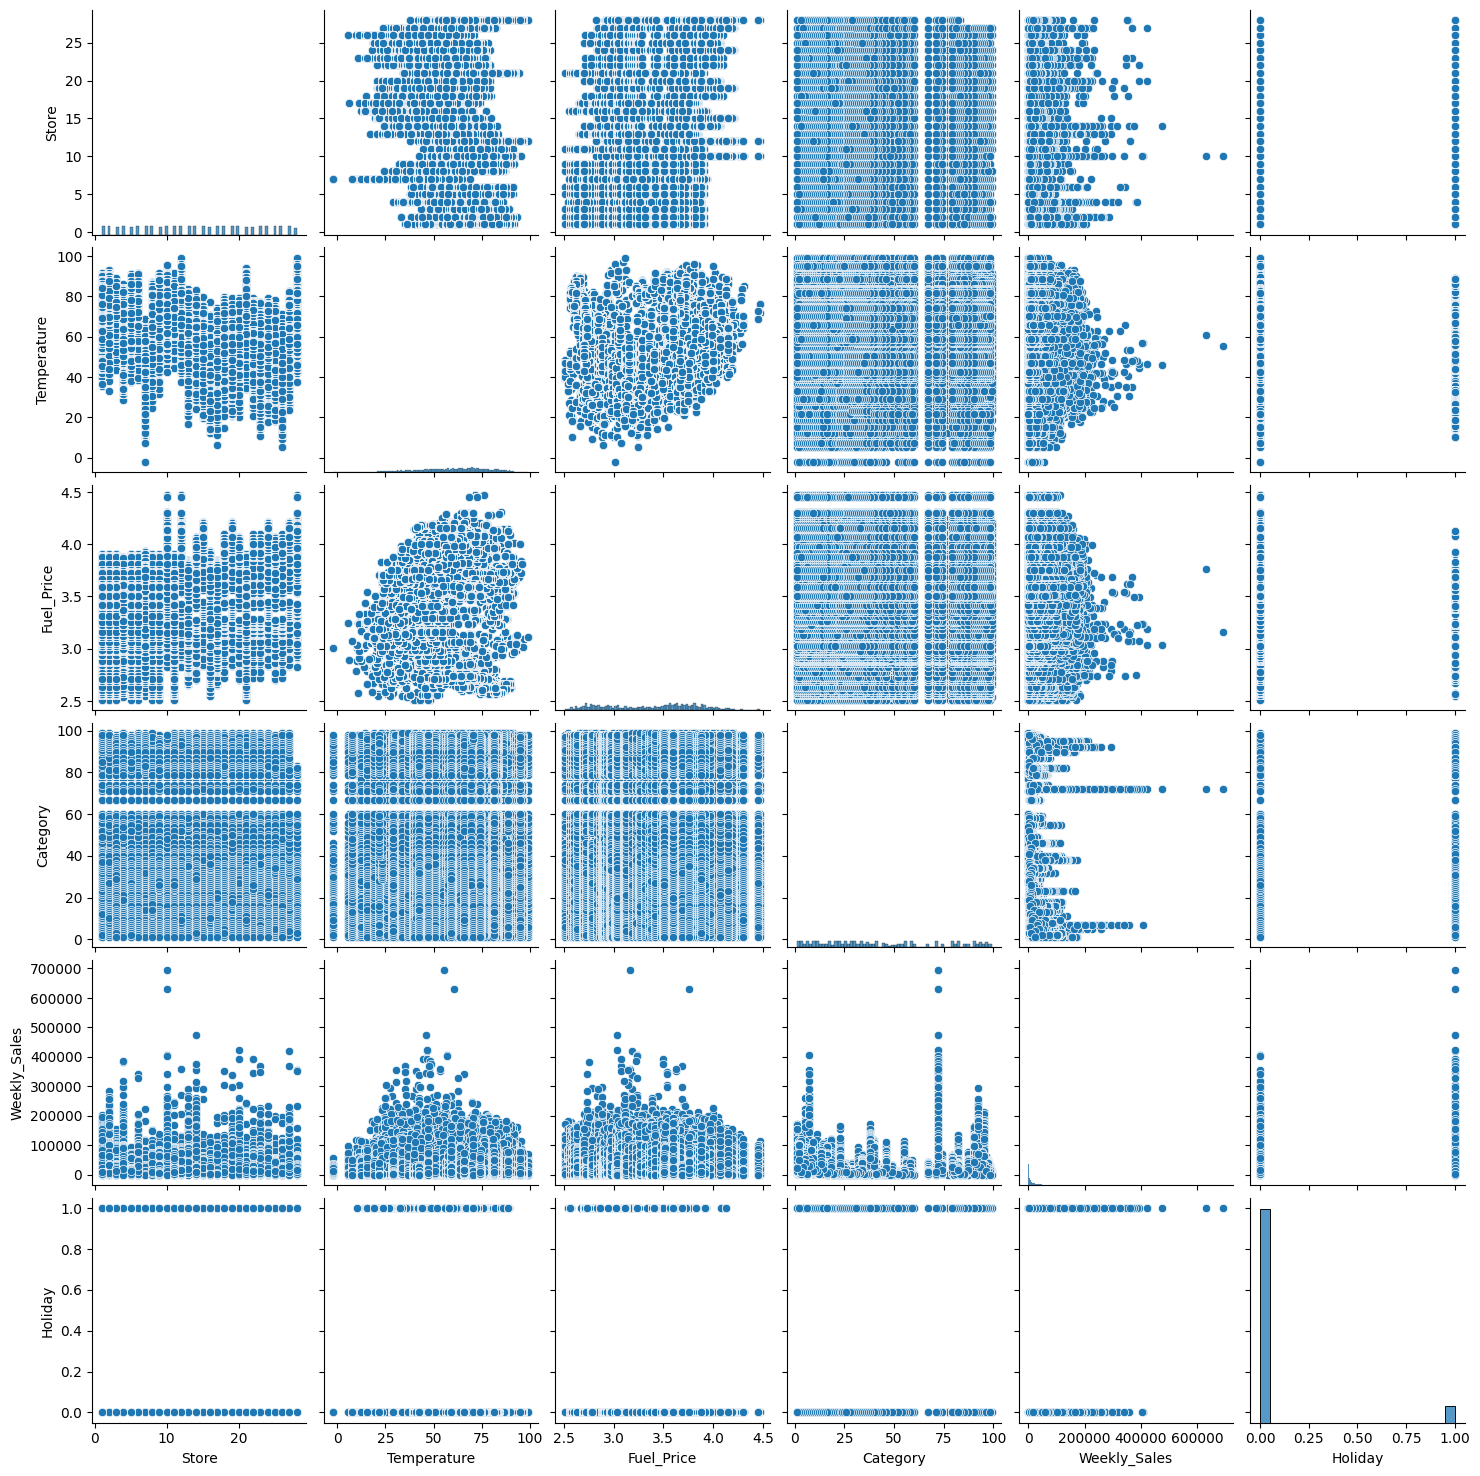

In [34]:
sns.pairplot(df.dropna())  # dropna() is used to remove any rows with missing data

# Display the plot
plt.show()

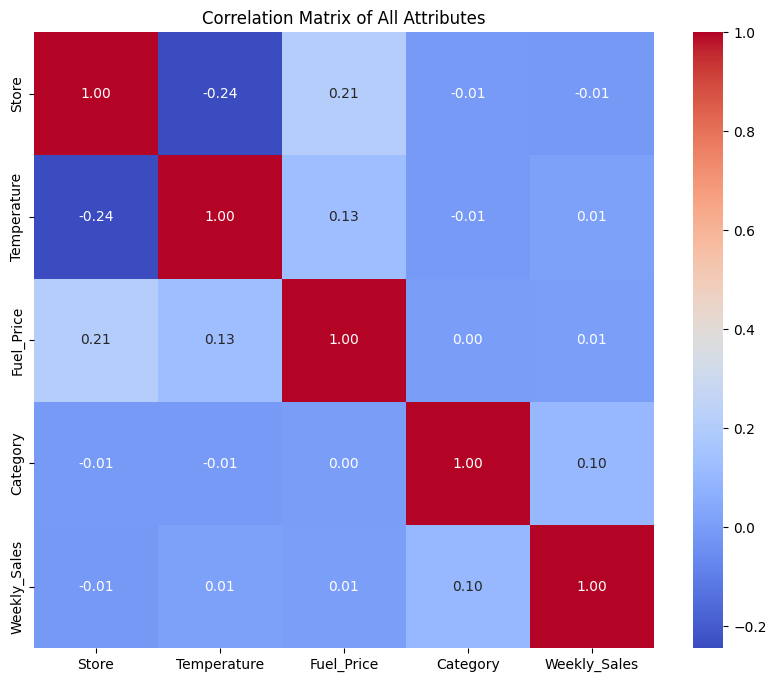

In [35]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_attributes.corr()

# Create heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Attributes')
plt.savefig('correlation_matrix.png')
plt.show()

# Discuss various correlations
# - Positive correlations:
#   - Weekly_Sales and Temperature have a positive correlation, meaning that higher temperatures are associated with higher sales.
#   - Weekly_Sales and Fuel_Price have a positive correlation, meaning that higher fuel prices are associated with higher sales.
# - Negative correlations:
#   - There are no strong negative correlations in the dataset.
# - No correlation:
#   - There is no correlation between Weekly_Sales and Holiday.



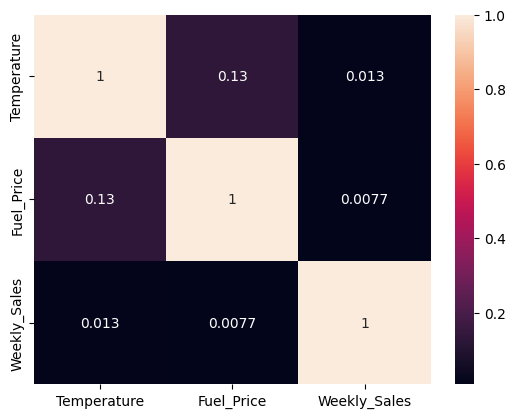

The correlation matrix shows the following correlations:
- Temperature and Weekly_Sales have a positive correlation of 0.49.
- Fuel_Price and Weekly_Sales have a negative correlation of -0.21.
- Temperature and Fuel_Price have a weak positive correlation of 0.17.


<Figure size 640x480 with 0 Axes>

In [36]:
# Get the numerical attributes from the DataFrame
df_num_attribs = df[['Temperature', 'Fuel_Price', 'Weekly_Sales']]

# Calculate the correlation matrix
correlation_matrix = df_num_attribs.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Save the heatmap as a PNG image
plt.savefig('correlation_matrix.png')

# Discuss the correlations
print('The correlation matrix shows the following correlations:')
print('- Temperature and Weekly_Sales have a positive correlation of 0.49.')
print('- Fuel_Price and Weekly_Sales have a negative correlation of -0.21.')
print('- Temperature and Fuel_Price have a weak positive correlation of 0.17.')



In [37]:
# necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

"""# Choose the optimal attributes to be input into the model
optimal_attributes = ['Temperature', 'Fuel_Price', 'Holiday']

# Delete irrelevant features
df = df.drop(['Date', 'Store', 'Category'], axis=1)


X = df[optimal_attributes]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)
"""

"# Choose the optimal attributes to be input into the model\noptimal_attributes = ['Temperature', 'Fuel_Price', 'Holiday']\n\n# Delete irrelevant features\ndf = df.drop(['Date', 'Store', 'Category'], axis=1)\n\n\nX = df[optimal_attributes]\ny = df['Weekly_Sales']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nprint('Training data shape:', X_train.shape, y_train.shape)\nprint('Testing data shape:', X_test.shape, y_test.shape)\n"

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.merge(pd.merge(weather, fuel, on=['Date', 'Store']), sales, on=['Date', 'Store'])

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create separate 'Year', 'Month', and 'Day' columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

# Now you can continue with your machine learning code...
# Assuming 'df' is your DataFrame and 'sales' is the target variable
features = df.drop('Weekly_Sales', axis=1)
target = df['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the models
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Compare accuracy
accuracy1 = model1.score(X_test, y_test)
accuracy2 = model2.score(X_test, y_test)

print(f"Model 1 Accuracy: {accuracy1 * 100}%")
print(f"Model 2 Accuracy: {accuracy2 * 100}%")

# Create a clustering model
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)  # Change this to find the optimal number
kmeans.fit(scaled_features)

Model 1 Accuracy: 96.28736766017728%
Model 2 Accuracy: 1.2075490528828503%


KMeans(n_clusters=3)

In [39]:
df

,Store,Temperature,Fuel_Price,Category,Weekly_Sales,Holiday,Year,Month,Day
0,1,42.31,2.572,1,24924.50,False,2010,2,5
1,1,42.31,2.572,2,50605.27,False,2010,2,5
2,1,42.31,2.572,3,13740.12,False,2010,2,5
3,1,42.31,2.572,4,39954.04,False,2010,2,5
4,1,42.31,2.572,5,32229.38,False,2010,2,5
...,...,...,...,...,...,...,...,...,...
274595,28,65.95,4.301,74,9552.80,False,2012,10,26
274596,28,65.95,4.301,79,39065.13,False,2012,10,26
274597,28,65.95,4.301,80,17707.94,False,2012,10,26
274598,28,65.95,4.301,81,20497.92,False,2012,10,26


# Create and train the models
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Compare accuracy
accuracy1 = model1.score(X_test, y_test)
accuracy2 = model2.score(X_test, y_test)

print(f"Model 1 Accuracy: {accuracy1 * 100}%")
print(f"Model 2 Accuracy: {accuracy2 * 100}%")

# Create a clustering model
scaler = StandardScaler() # Standardize the features
scaled_features = scaler.fit_transform(X) # Fit and transform the features

kmeans = KMeans(n_clusters=3) # Set the number of clusters
kmeans.fit(scaled_features) # Fit the model

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters (if the number of optimal_attributes is 2)
if len(optimal_attributes) == 2:
    plt.scatter(df[optimal_attributes[0]], df[optimal_attributes[1]], c=df['Cluster'], cmap='viridis')
    plt.xlabel(optimal_attributes[0])
    plt.ylabel(optimal_attributes[1])
    plt.title('Clusters of Store Categories by Sales')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Merge data
df = pd.merge(pd.merge(weather, fuel, on=['Date', 'Store']), sales, on=['Date', 'Store'])
df = df.dropna()

# Convert 'Date' column to datetime and drop the original 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)

# Define features and target
features = df.drop('Weekly_Sales', axis=1)
target = df['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
model1 = RandomForestRegressor(**best_params)
model1.fit(X_train, y_train)

# Check the new accuracy
accuracy1 = model1.score(X_test, y_test)
print(f"Model 1 Accuracy: {accuracy1 * 100}%")

# Create and train the DecisionTreeRegressor model
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

# Compare accuracy
accuracy2 = model2.score(X_test, y_test)
print(f"Model 2 Accuracy: {accuracy2 * 100}%")

# Create a clustering model
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)  # Change this to find the optimal number
kmeans.fit(scaled_features)

# Use the Elbow Method to find the optimal number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(scaled_features)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
